In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_all = np.loadtxt('PV_4f_Fig1_exp.csv', skiprows = 2, delimiter = ',')
vol_all = data_all[:,0]
pressure_all = np.mean(data_all[:,1:-1], axis = 1)


#note: checked and this is averaged correctly w/o any extra volume stuff

R = 10 #mm
H = 18 #mm
vol_0 = np.pi * R * R * H * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_0 = pressure_all[0]



In [4]:
data_3 = np.loadtxt('pv_data_3f_clip.csv', skiprows = 2, delimiter = ',')
#col 0 and 3 are volume
#rest are pressure rip

vol_3 = np.mean(data_3[:,[0,3]], axis = 1)
pressure_3 = np.mean(data_3[:,[1,2,4,5,6,7,8]], axis = 1)

R_3 = 8 #mm
H_3 = 20 #mm

vol_03 = np.pi * R_3 * R_3 * H_3 * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
pressure_03 = pressure_3[0]

In [5]:
sim_all = np.loadtxt('v106_results.txt', skiprows = 2)
#vol | pressure
vol_sim = sim_all[:,0] #in mm^3 but we divide it out
pressure_sim = sim_all[:,1] * 1e3 #kPa

In [6]:
sim_v112 = np.loadtxt('v112_results.txt', skiprows = 2)
vol_v112 = sim_v112[:,0]
pressure_v112 = sim_v112[:,1] * 1e3 #kpa

sim_v113 = np.loadtxt('v113_results.txt', skiprows = 2)
vol_v113 = sim_v113[:,0]
pressure_v113 = sim_v113[:,1] * 1e3 #kpa

sim_v116 = np.loadtxt('v116_results.txt', skiprows = 2)
vol_v116 = sim_v116[:,0]
pressure_v116 = sim_v116[:,1] * 1e3 #kpa

sim_3d_v100 = np.loadtxt('v100_3d_results.txt', skiprows = 2)
vol_3d_v100 = sim_3d_v100[:,0]
pressure_3d_v100 = sim_3d_v100[:,1] * 1e3 #kpa (probably)

(0.0, 1.0)

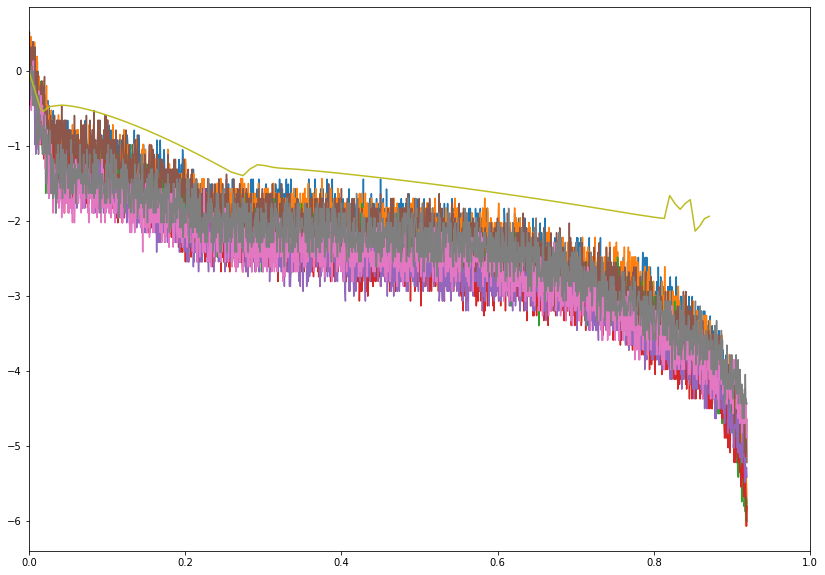

In [7]:
fig, ax = plt.subplots(figsize = (14,10))
for i in range(1,np.shape(data_all)[1]):
    ax.plot(vol_all/vol_0, data_all[:,i])
ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
ax.set_xlim(left = 0, right = 1.)

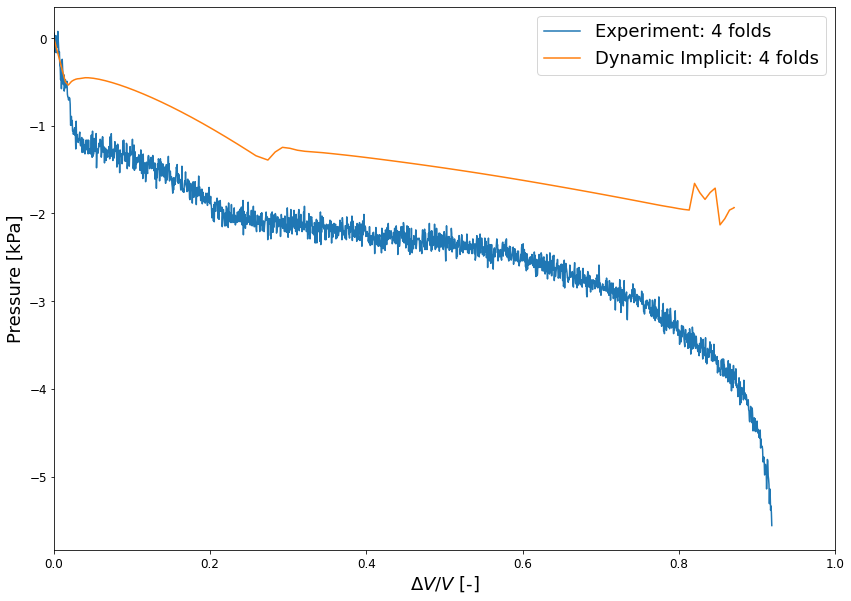

In [9]:
fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_all/vol_0,pressure_all, label = 'Experiment: 4 folds')
# ax.plot(-(vol_sim - vol_sim[0])/vol_sim[0], pressure_sim, label = 'Simulation: 4 folds')
ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113

# ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
# ax.plot(-(vol_v116 - vol_v116[0])/vol_v116[0], pressure_v116, label = 'Dynamic Implicit: 3 folds') #v116

ax.set_xlabel("$\Delta V / V$ [-]", fontsize = 18)
ax.set_ylabel("Pressure [kPa]", fontsize = 18)
ax.tick_params(labelsize = 12)
ax.set_xlim(left = 0, right = 1.)
ax.legend(loc = 'best', fontsize = 18)
# ax.set_title(label = '4 folds', fontsize = 22)

plt.savefig('exp_vs_sim.png')

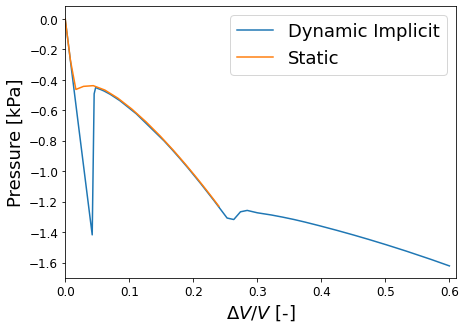

In [11]:
fig, ax = plt.subplots(figsize = (7,5))
# ax.plot(vol_all/vol_0,pressure_all, label = 'Experiment')
ax.plot(-(vol_sim - vol_sim[0])/vol_sim[0], pressure_sim, label = 'Dynamic Implicit') #v106
ax.plot(-(vol_v112 - vol_v112[0])/vol_v112[0], pressure_v112, label = 'Static') #v112

ax.set_xlabel("$\Delta V / V$ [-]", fontsize = 18)
ax.set_ylabel("Pressure [kPa]", fontsize = 18)
ax.tick_params(labelsize = 12)
ax.set_xlim(left = 0, right = 0.61)
ax.legend(loc = 'best', fontsize = 18)

plt.savefig('static_vs_dyn.png')


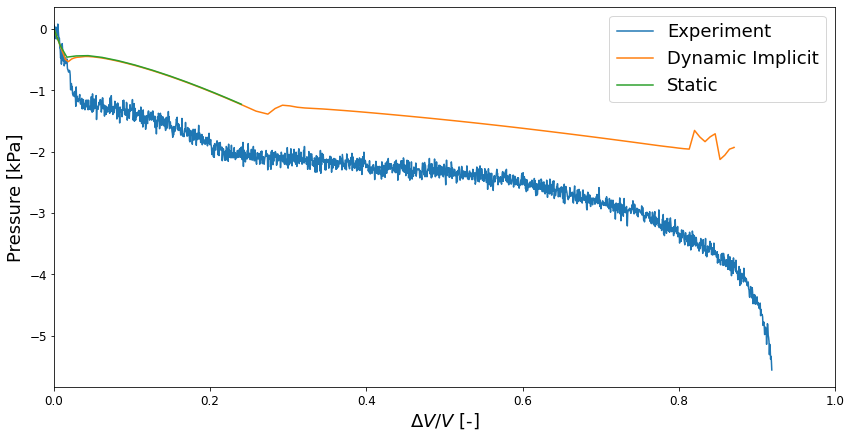

In [12]:
fig, ax = plt.subplots(figsize = (14,7))
ax.plot(vol_all/vol_0,pressure_all, label = 'Experiment')
# ax.plot(-(vol_sim - vol_sim[0])/vol_sim[0], pressure_sim, label = 'Dynamic Implicit')

ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit') #v113
ax.plot(-(vol_v112 - vol_v112[0])/vol_v112[0], pressure_v112, label = 'Static') #v112
# ax.plot(-(vol_sim - vol_sim[0])/vol_sim[0], pressure_sim, label = 'Dynamic Implicit')

ax.set_xlabel("$\Delta V / V$ [-]", fontsize = 18)
ax.set_ylabel("Pressure [kPa]", fontsize = 18)
ax.tick_params(labelsize = 12)
ax.set_xlim(left = 0, right = 1.)
ax.legend(loc = 'best', fontsize = 18)

plt.savefig('exp_vs_sim.png')

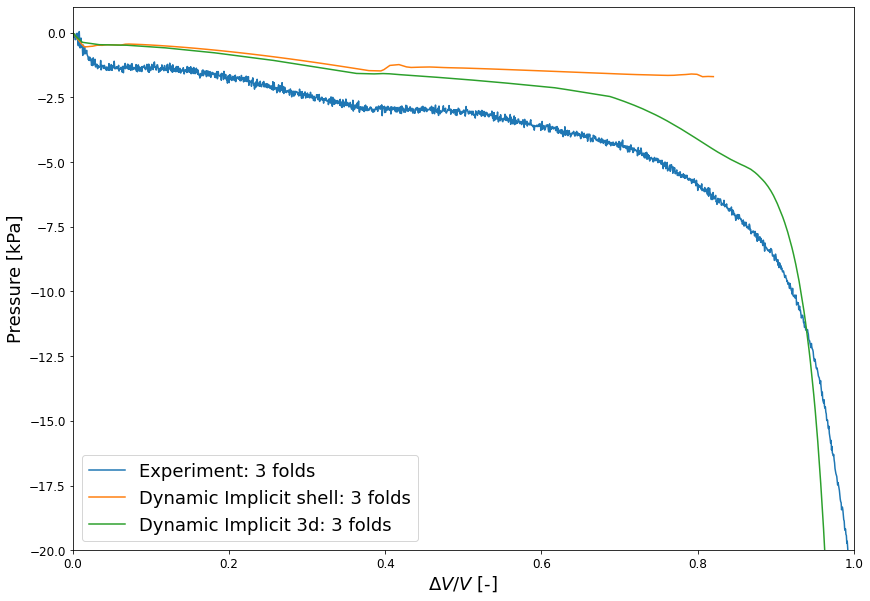

In [13]:
fig, ax = plt.subplots(figsize = (14,10))


ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
ax.plot(-(vol_v116 - vol_v116[0])/vol_v116[0], pressure_v116, label = 'Dynamic Implicit shell: 3 folds') #v116
ax.plot(-(vol_3d_v100 - vol_3d_v100[0])/vol_3d_v100[0], pressure_3d_v100, label = 'Dynamic Implicit 3d: 3 folds') #v100 3d

ax.set_xlabel("$\Delta V / V$ [-]", fontsize = 18)
ax.set_ylabel("Pressure [kPa]", fontsize = 18)
ax.tick_params(labelsize = 12)
ax.set_xlim(left = 0, right = 1.)
ax.legend(loc = 'best', fontsize = 18)
# ax.set_title(label = '4 folds', fontsize = 22)

ax.set_ylim([-20,1])

plt.savefig('exp_vs_sim.png')